### In this notebook , we are trying to caculate the confidence interval on a statistic of interest when these values are not explicitly given out by the library packages
### We will use bootstrapping to get the estimates

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [5]:
# reading the dataset:
df = pd.read_csv("boston.csv")

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Data Set description:
**Variable** | **__ Description__** |** Type**
---|---|---
CRIM|CRIM: per capita crime rate by town|Float
ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|float
INDUS|proportion of non-retail business acres per town |float
CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |Qualitative
NOX|nitric oxides concentration (parts per 10 million) |float
RM|Average number of rooms|float
AGE|proportion of owner-occupied units built prior to 1940 |float
DIS|weighted distances to five Boston employment centres|float
RAD|Index of accessibility to radial highways|Integer
TAX|full value property tax rate per 10,000 USD |Integer
PTRATIO|pupil-teacher ratio by town | float
B|B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |Float
LSTAT| Percent of lower status of the population |FLoat
MEDV|Median value of owner-occupied homes in $1000's|float


- Response Variable = Medv
- Problem Statement - Predict the confidence interval of Medv based on the values in the data set

#### Exploratory Data analysis


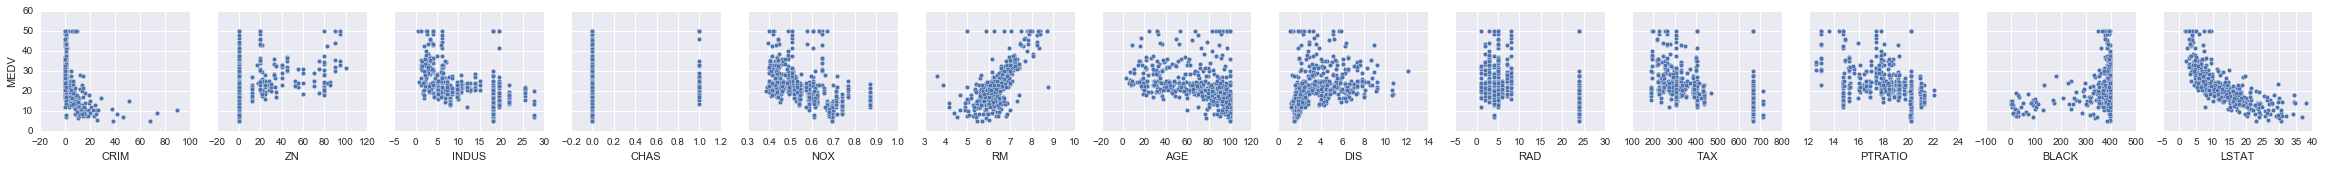

In [10]:
plt.figure(figsize=(20,10))
sns.pairplot(data = df , x_vars = ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BLACK","LSTAT"],y_vars = ["MEDV"])


14

In [31]:
#The statistic of interst in this case is the response variable MEDV
# we will try to compute the estimated value of population mean for this response variable.
# empty list to hold the bootstrapped mean
alpha_list = []
Boot_size = 1000
temp_sum = 0  # a temp var to hold  the running sum
for i in range(0,Boot_size):
    # creating a bootstrapped sample with the same size as the original data frame
    df_booted = df.sample(frac = 1 , replace = True)
    alpha_i = df_booted.MEDV.mean() 
    alpha_list.append(alpha_i) 
    


print "The std deviation from the bootstrapped sample is %r " %np.std(alpha_list)
sigma_alpha_scaled = (sum(alpha_list))/Boot_size
#print sigma_alpha_scaled
for i in range(0,Boot_size):
    temp_sum = (alpha_list[i] - sigma_alpha_scaled)**2


Std_estimate = np.sqrt(temp_sum/(Boot_size -1))

    
    

The std deviation from the bootstrapped sample is 0.40633559751833326 


In [33]:
print "The 95 percent confidence interval for population mean - [%r and %r] " %(df.MEDV.mean()-2*Std_estimate,df.MEDV.mean()+2*Std_estimate)

The 95 percent confidence interval for population mean - [22.532036055510588 and 22.533576592710808] 
